In [1]:
#install.packages('Metrics')
library('astsa')
library(forecast)
library('Metrics')

options(repr.plot.width=14, repr.plot.height=6)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas



Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




In [2]:
setwd('./')
#ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_resampled.csv")
ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_no_weekends_resampled.csv")

In [3]:
ts_df <- ts_df[,2]

x = ts(ts_df, start=0 , frequency=1)


In [4]:
x = x/300000 # paso la unidad a slots

In [5]:
ts_df = ts_df/300000 # paso la unidad a slots

In [6]:
ts_df = ts(ts_df, start=0, frequency=1)

In [7]:
length(ts_df)

[1] 6048

In [8]:
time(ts_df)

A Time Series:
   [1]    0    1    2    3    4    5    6    7    8    9   10   11   12   13
  [15]   14   15   16   17   18   19   20   21   22   23   24   25   26   27
  [29]   28   29   30   31   32   33   34   35   36   37   38   39   40   41
  [43]   42   43   44   45   46   47   48   49   50   51   52   53   54   55
  [57]   56   57   58   59   60   61   62   63   64   65   66   67   68   69
  [71]   70   71   72   73   74   75   76   77   78   79   80   81   82   83
  [85]   84   85   86   87   88   89   90   91   92   93   94   95   96   97
  [99]   98   99  100  101  102  103  104  105  106  107  108  109  110  111
 [113]  112  113  114  115  116  117  118  119  120  121  122  123  124  125
 [127]  126  127  128  129  130  131  132  133  134  135  136  137  138  139
 [141]  140  141  142  143  144  145  146  147  148  149  150  151  152  153
 [155]  154  155  156  157  158  159  160  161  162  163  164  165  166  167
 [169]  168  169  170  171  172  173  174  175  176  177  178  179  180  181
 [183]  182  183  184  185  186  187  188  189  190  191  192  193  194  195
 [197]  196  197  198  199  200  201  202  203  204  205  206  207  208  209
 [211]  210  211  212  213  214  215  216  217  218  219  220  221  222  223
 [225]  224  225  226  227  228  229  230  231  232  233  234  235  236  237
 [239]  238  239  240  241  242  243  244  245  246  247  248  249  250  251
 [253]  252  253  254  255  256  257  258  259  260  261  262  263  264  265
 [267]  266  267  268  269  270  271  272  273  274  275  276  277  278  279
 [281]  280  281  282  283  284  285  286  287  288  289  290  291  292  293
 [295]  294  295  296  297  298  299  300  301  302  303  304  305  306  307
 [309]  308  309  310  311  312  313  314  315  316  317  318  319  320  321
 [323]  322  323  324  325  326  327  328  329  330  331  332  333  334  335
 [337]  336  337  338  339  340  341  342  343  344  345  346  347  348  349
 [351]  350  351  352  353  354  355  356  357  358  359  360  361  362  363
 [365]  364  365  366  367  368  369  370  371  372  373  374  375  376  377
 [379]  378  379  380  381  382  383  384  385  386  387  388  389  390  391
 [393]  392  393  394  395  396  397  398  399  400  401  402  403  404  405
 [407]  406  407  408  409  410  411  412  413  414  415  416  417  418  419
 [421]  420  421  422  423  424  425  426  427  428  429  430  431  432  433
 [435]  434  435  436  437  438  439  440  441  442  443  444  445  446  447
 [449]  448  449  450  451  452  453  454  455  456  457  458  459  460  461
 [463]  462  463  464  465  466  467  468  469  470  471  472  473  474  475
 [477]  476  477  478  479  480  481  482  483  484  485  486  487  488  489
 [491]  490  491  492  493  494  495  496  497  498  499  500  501  502  503
 [505]  504  505  506  507  508  509  510  511  512  513  514  515  516  517
 [519]  518  519  520  521  522  523  524  525  526  527  528  529  530  531
 [533]  532  533  534  535  536  537  538  539  540  541  542  543  544  545
 [547]  546  547  548  549  550  551  552  553  554  555  556  557  558  559
 [561]  560  561  562  563  564  565  566  567  568  569  570  571  572  573
 [575]  574  575  576  577  578  579  580  581  582  583  584  585  586  587
 [589]  588  589  590  591  592  593  594  595  596  597  598  599  600  601
 [603]  602  603  604  605  606  607  608  609  610  611  612  613  614  615
 [617]  616  617  618  619  620  621  622  623  624  625  626  627  628  629
 [631]  630  631  632  633  634  635  636  637  638  639  640  641  642  643
 [645]  644  645  646  647  648  649  650  651  652  653  654  655  656  657
 [659]  658  659  660  661  662  663  664  665  666  667  668  669  670  671
 [673]  672  673  674  675  676  677  678  679  680  681  682  683  684  685
 [687]  686  687  688  689  690  691  692  693  694  695  696  697  698  699
 [701]  700  701  702  703  704  705  706  707  708  709  710  711  712  713
 [715]  714  715  716  717  718  719  720  721  722  723  

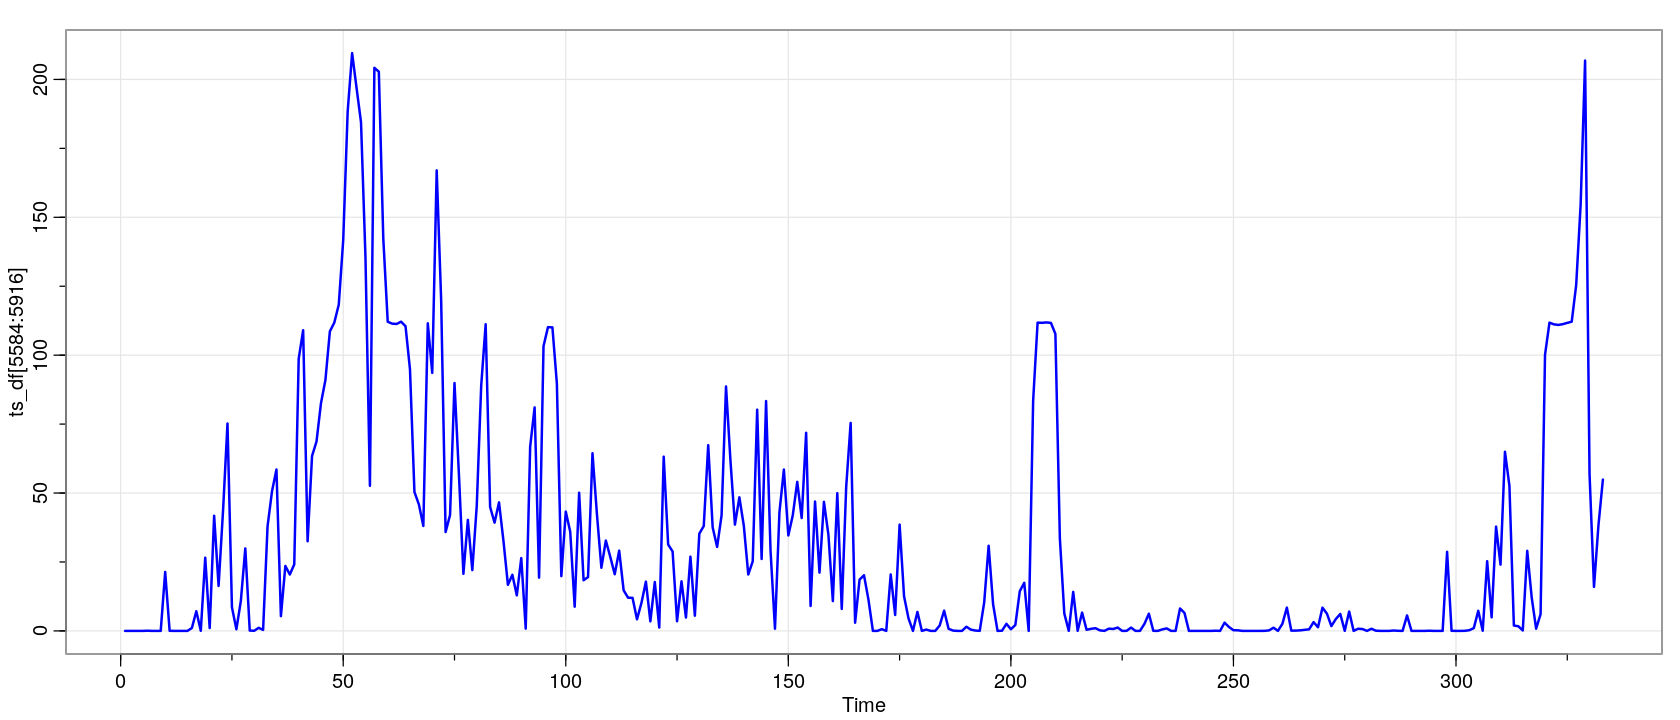

In [9]:
# dias 19 al 21 de mayo (arranca en 18*288=5184)
tsplot(ts_df[5584:5916], col=4, lwd=2)

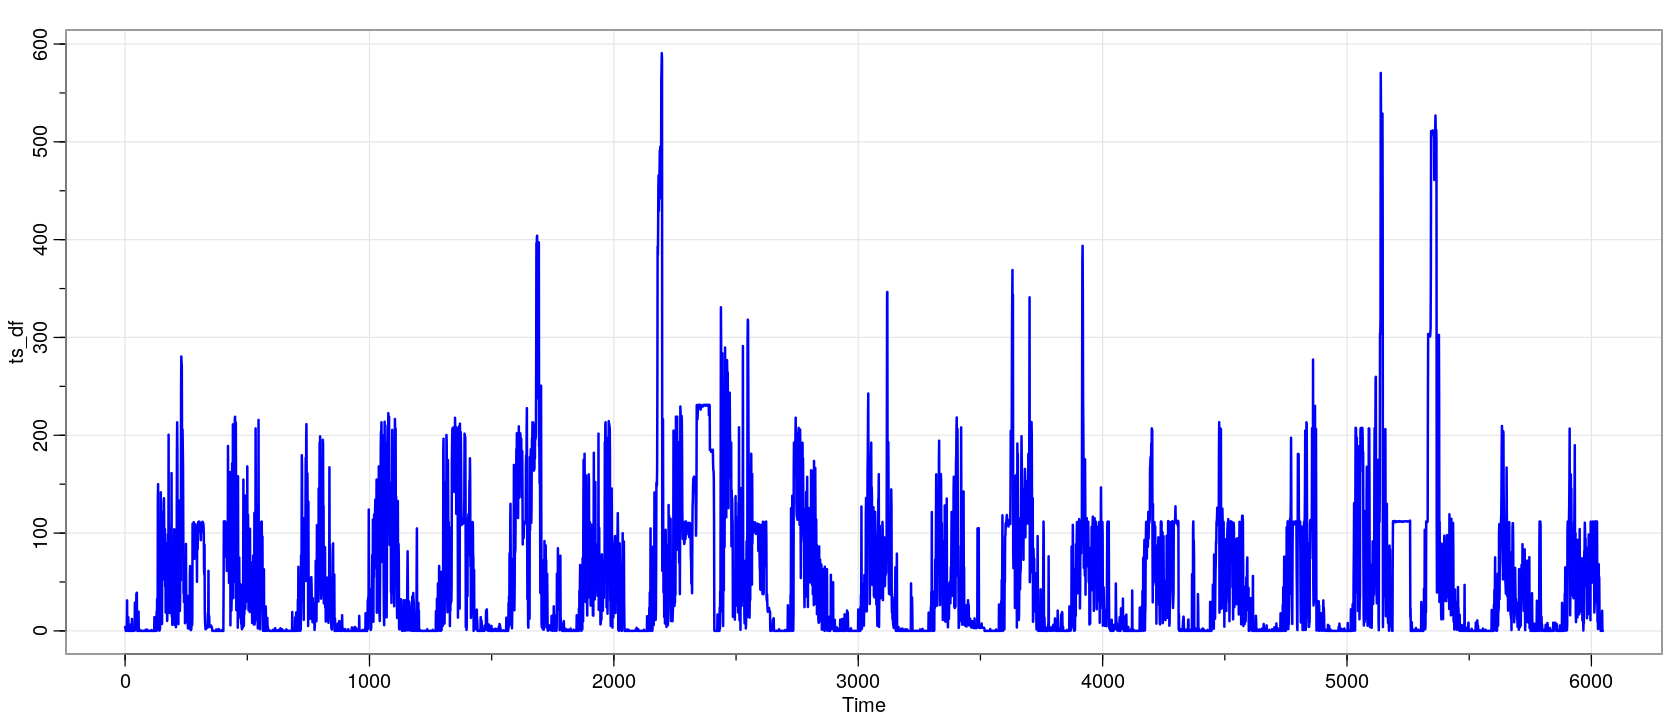

In [10]:
tsplot(ts_df, col=4, lwd=2)

In [47]:

train_predict <- function(start_train, start_test, time_series) {
    
    ret = c(0,0)
    
    ts_length = length(time_series)        
    
    end_train = start_test - 1

    ts_df_train = ts(time_series[start_train:end_train], start=start_train-1, frequency=1)
    ts_df_test = ts(time_series[start_test:ts_length], start=start_test-1, frequency=1)
    
    dn = ts_df_train
    dnt = ts_df_test
    
    # nuevos datos para prediccion
    new_t = seq(start_test-1,start_test-1,by=1)
    new_t = ts(new_t,start=start_test-1,freq=1)
    new_data = data.frame(t=new_t)
    
    # agrego para probar +1 para evitar log(0)
    ldn = log(dn+1)
    ldnt = log(dnt+1)
    t = time(ldn)
    
    fit = lm(ldn ~ t, na.action=NULL)
    
    #ndata <- data.frame(t = start_test-1)
    ndata <- data.frame(t = new_data)
    
    predict_trend = predict(fit,newdata=ndata)
    
    predicttrend = ts(fitted(fit), start=start_train-1, freq=1)
    
    #ldn = as.numeric(ldn)
    ldnc = ldn-predicttrend
    
    ###
    ldnc = ts(ldn-predicttrend, start=start_train-1, freq=1)
    ### 
    
    t = time(ldnc)

    #f1 =  0.000192
    #f2 =  0.000385
    #f3 =  0.000578
    #f4 =  0.000771
    #f5 =  0.000964
    #f6 =  0.001157
    #f7 =  0.002507
    #f8 =  0.002893
    #f9 =  0.003472
    #f10 = 0.004436
    #f11 = 0.006944
    #f12 = 0.010416    
    
    f1 =  0.003473
    f2 =  0.006946
    f3 =  0.010419

    fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) ,
                      cos(2*pi*f2*t) + sin(2*pi*f2*t) +
                     cos(2*pi*f3*t) + sin(2*pi*f3*t) ,
             na.action=NULL)
    
    prediction = ts(fitted(fit), start=start_train-1, freq=1)
    
    #tn = ts_length
    tn = start_test - 1 
            
    v = 0 + cos(2*pi*f1*tn) + sin(2*pi*f1*tn) +
                  cos(2*pi*f2*tn) + sin(2*pi*f2*tn) +
                 cos(2*pi*f3*tn) + sin(2*pi*f3*tn)

    #vdf <- data.frame(t = v)
    
    vdf <- data.frame(t = new_data)
    fore_f = predict(fit, vdf)    

    res = (ts(residuals(fit), start=start_train -1, freq=1))

    ldncr1 = res
        
    fit = Arima(ldncr1, order = c(5,0,0), include.mean=FALSE)
    #fit = Arima(ldncr1, order = c(6,0,0), include.mean=FALSE, 
    #            seasonal = list(order = c(6,0,0), period = 6))
    #fit = Arima(ldncr1, order = c(6,0,6), include.mean=FALSE, 
    #            seasonal = list(order = c(5,0,1), period = 6))
    fore = forecast(fit, h=1)   
    
    ldnt = as.numeric(ldnt)
    
    #e = exp(1)

    ldnt = ts(ldnt, start=start_test -1, frequency=1)    
    
    v_ldnt = ldnt #c + predictiont
    v_pred = fore$mean + fore_f + predict_trend    
    #v_pred = fore_f + predict_trend
    #v_pred = fore_f

    #v_ldnt = (e^v_ldnt) 
    #v_pred = (e^v_pred) -1 
    
    v_ldnt = (exp(v_ldnt)) -1 
    v_pred = (exp(v_pred)) -1 
    
    v_ldnt[1:5]
    v_pred[1:5]
    ret = c(v_ldnt[1], v_pred[1], time(v_ldnt)[1], time(v_pred)[1],fore$mean,fore_f,predict_trend)
    #ret = c(v_ldnt[1], v_pred[1], time(v_ldnt)[1], time(v_pred)[1])
    
    return(ret)
    
}

In [48]:
#testv <- train_predict(6500-6400, 6500, ts_df)
#testv

In [49]:
Sys.time()

[1] "2021-07-24 16:27:01 -03"

In [50]:
start_train = 1
start_test = 5306
# time serie : ts_df
testv <- train_predict(start_train, start_test, ts_df)
print(paste("observed -", "prediction"))
testv

[1] "observed - prediction"


1                                                   1 
   0.0365200    6.2856666 5305.0000000 5305.0000000    0.1400533   -0.8294317 
           1 
   2.6752874

In [51]:
Sys.time()

[1] "2021-07-24 16:27:02 -03"

In [52]:
df_validation <- data.frame(observed=double(), predicted=double(), timeo=integer(), timep=integer())

vect_obs <- c()
vect_pred <- c()

vect_arma <- c()
vect_freq <- c()
vect_tren <- c()
vect_tren_freq <- c()

for (i in (5472:5750)) {   
    print(i)
    #print(paste0("parametros: ", i-5180, " ", i))
    testv <- train_predict(i-5200, i, ts_df)
    print(testv)
    vect_obs <- append(vect_obs, testv[1])
    vect_pred <- append(vect_pred, testv[2])
    vect_arma <- append(vect_arma, testv[5])
    vect_freq <- append(vect_freq, testv[6])
    vect_tren <- append(vect_tren, testv[7])
    vect_tren_freq <- append(vect_tren_freq, testv[6]+testv[7])
    
    
    #print(testv)
    df_validation[nrow(df_validation)+1,] = testv
}

[1] 5472
                        1                                                   1 
   0.8894667    2.8298830 5471.0000000 5471.0000000   -1.2835753   -0.1365477 
           1 
   2.7629572 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5473
                        1                                                   1 
   0.0000000    1.6688292 5472.0000000 5472.0000000   -1.5995680   -0.1795888 
           1 
   2.7607967 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5474
                          1                                           
   0.05778333    0.69387697 5473.00000000 5473.00000000   -2.00840309 
            1             1 
  -0.22347120    2.75889426 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5475
                        1                                                   1 
   1.1294233    0.6095311 5474.0000000 5474.0000000   -2.0138272   -0.2668228 
           1 
   2.7565930 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5476
                        1                                                   1 
   1.6453000    1.2133591 5475.0000000 5475.0000000   -1.6505398   -0.3097787 
           1 
   2.7548299 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5477
                        1                                                   1 
   0.0005200    1.4005897 5476.0000000 5476.0000000   -1.5250384   -0.3527373 
           1 
   2.7534901 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5478
                        1                                                   1 
   0.0000000    0.5521829 5477.0000000 5477.0000000   -1.9159154   -0.3966488 
           1 
   2.7522265 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5479
                          1                                           
 1.486667e-03  4.248721e-01  5.478000e+03  5.478000e+03 -1.956515e+00 
            1             1 
-4.403432e-01  2.750940e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5480
                        1                                                   1 
   0.0000000    0.4072772 5479.0000000 5479.0000000   -1.9241780   -0.4838195 
           1 
   2.7496543 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5481
                        1                                                   1 
   0.3463767    0.3092630 5480.0000000 5480.0000000   -1.9518444   -0.5270538 
           1 
   2.7483626 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5482
                        1                                                   1 
  47.0158767    0.4166327 5481.0000000 5481.0000000   -1.8291008   -0.5698994 
           1 
   2.7472829 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5483
                          1                                           
   0.00000000    7.65743368 5482.00000000 5482.00000000    0.02054692 
            1             1 
  -0.61113606    2.74900748 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5484
                      1                                               1 
   0.000000    1.323446 5483.000000 5483.000000   -1.251132   -0.653561 
          1 
   2.747744 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5485
                        1                                                   1 
   1.7757500    0.6432199 5484.0000000 5484.0000000   -1.5541431   -0.6955341 
           1 
   2.7463349 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5486
                        1                                                   1 
   0.0335500    1.7885857 5485.0000000 5485.0000000   -0.9834135   -0.7368960 
           1 
   2.7458440 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5487
                        1                                                   1 
   0.0000000    0.8435003 5486.0000000 5486.0000000   -1.3546479   -0.7782979 
           1 
   2.7446119 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5488
                        1                                                   1 
   0.0000000    0.2909854 5487.0000000 5487.0000000   -1.6686132   -0.8193193 
           1 
   2.7433382 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5489
                          1                                           
   0.06243667    0.29123744 5488.00000000 5488.00000000   -1.62652210 
            1             1 
  -0.85995541    2.74207852 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5490
                        1                                                   1 
   0.0000000    0.3014069 5489.0000000 5489.0000000   -1.5772691   -0.9001548 
           1 
   2.7408699 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5491
                        1                                                   1 
   0.4985933    0.1882510 5490.0000000 5490.0000000   -1.6271904   -0.9399341 
           1 
   2.7396070 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5492
                        1                                                   1 
   2.4941200    0.4334958 5491.0000000 5491.0000000   -1.3994326   -0.9790552 
           1 
   2.7386039 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5493
                        1                                                   1 
   0.0445700    1.3138700 5492.0000000 5492.0000000   -0.8819596   -1.0174248 
           1 
   2.7383058 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5494
                        1                                                   1 
   3.8997733    0.5005993 5493.0000000 5493.0000000   -1.2754443   -1.0557540 
           1 
   2.7370629 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5495
                          1                                           
 3.733333e-04  1.887405e+00  5.494000e+03  5.494000e+03 -5.836733e-01 
            1             1 
-1.092962e+00  2.736993e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5496
                          1                                           
 9.723333e-03  6.991723e-01  5.495000e+03  5.495000e+03 -1.075281e+00 
            1             1 
-1.130028e+00  2.735450e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5497
                      1                                               1 
   5.581453    0.411155 5496.000000 5496.000000   -1.222983   -1.166783 
          1 
   2.734175 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5498
                        1                                                   1 
   8.4678700    2.2992152 5497.0000000 5497.0000000   -0.3384081   -1.2022788 
           1 
   2.7343715 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5499
                        1                                                   1 
   0.0258500    4.1729596 5498.0000000 5498.0000000    0.1456599   -1.2369685 
           1 
   2.7347535 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5500
                          1                                           
 8.666667e-05  9.029924e-01  5.499000e+03  5.499000e+03 -8.180837e-01 
            1             1 
-1.271978e+00  2.733490e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5501
                        1                                                   1 
   0.0337100    0.5715117 5500.0000000 5500.0000000   -0.9737878   -1.3064260 
           1 
   2.7322518 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5502
                          1                                           
   0.02176667    0.55997358 5501.00000000 5501.00000000   -0.94613658 
            1             1 
  -1.34020073    2.73100619 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5503
                        1                                                   1 
   0.0247100    0.3230222 5502.0000000 5502.0000000   -1.0765025   -1.3733675 
           1 
   2.7297887 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5504
                          1                                           
   0.05642667    0.14326465 5503.00000000 5503.00000000   -1.18881419 
            1             1 
  -1.40587133    2.72857342 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5505
                        1                                                   1 
   0.1204733    0.1579621 5504.0000000 5504.0000000   -1.1430343   -1.4376878 
           1 
   2.7273837 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5506
                        1                                                   1 
   0.1104567    0.1961067 5505.0000000 5505.0000000   -1.0783751   -1.4687562 
           1 
   2.7262032 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5507
                          1                                           
   0.06496667    0.20100933 5506.00000000 5506.00000000   -1.04273277 
            1             1 
  -1.49912360    2.72501868 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5508
                          1                                           
   0.02200333    0.18012942 5507.00000000 5507.00000000   -1.02939310 
            1             1 
  -1.52879367    2.72381089 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5509
                          1                                           
   0.02906667    0.15290958 5508.00000000 5508.00000000   -1.02254104 
            1             1 
  -1.55776595    2.72259580 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5510
                          1                                           
   0.07281333    0.14640384 5509.00000000 5509.00000000   -0.99877037 
            1             1 
  -1.58598657    2.72138688 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5511
                        1                                                   1 
   2.1972233    0.1605673 5510.0000000 5510.0000000   -0.9578714   -1.6134105 
           1 
   2.7201907 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5512
                        1                                                   1 
   0.0000000    0.9838846 5511.0000000 5511.0000000   -0.3951367   -1.6395956 
           1 
   2.7197892 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5513
                          1                                           
   0.04641333    0.33355098 5512.00000000 5512.00000000   -0.76521299 
            1             1 
  -1.66550188    2.71856016 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5514
                        1                                                   1 
   0.0000000    0.2302769 5513.0000000 5513.0000000   -0.8195362   -1.6905797 
           1 
   2.7173552 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5515
                          1                                           
 7.333333e-05  2.159959e-01  5.514000e+03  5.514000e+03 -8.056911e-01 
            1             1 
-1.714876e+00  2.716130e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5516
                          1                                           
   0.01953333    0.17896049 5515.00000000 5515.00000000   -0.81192419 
            1             1 
  -1.73833780    2.71489509 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5517
                        1                                                   1 
   0.0407400    0.1038098 5516.0000000 5516.0000000   -0.8539485   -1.7609382 
           1 
   2.7136544 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5518
                          1                                           
 3.683333e-03  1.160147e-01  5.517000e+03  5.517000e+03 -8.199825e-01 
            1             1 
-1.782699e+00  2.712445e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5519
                          1                                           
   0.00000000    0.09697238 5518.00000000 5518.00000000   -0.81503978 
            1             1 
  -1.80363621    2.71122999 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5520
                          1                                           
   0.00000000    0.09080407 5519.00000000 5519.00000000   -0.79938762 
            1             1 
  -1.82369859    2.71000132 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5521
                          1                                           
   0.03487333    0.08930900 5520.00000000 5520.00000000   -0.78034532 
            1             1 
  -1.84289251    2.70878138 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5522
                          1                                           
   0.03963667    0.10474293 5521.00000000 5521.00000000   -0.74678714 
            1             1 
  -1.86118390    2.70758371 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5523
                          1                                           
   0.07144333    0.10965684 5522.00000000 5522.00000000   -0.72375870 
            1             1 
  -1.87857196    2.70638147 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5524
                        1                                                   1 
   0.0000000    0.1290179 5523.0000000 5523.0000000   -0.6888060   -1.8950235 
           1 
   2.7051776 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5525
                          1                                           
   0.07264333    0.09954079 5524.00000000 5524.00000000   -0.69841963 
            1             1 
  -1.91043127    2.70374353 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5526
                        1                                                   1 
   0.0000000    0.1304876 5525.0000000 5525.0000000   -0.6548156   -1.9248711 
           1 
   2.7023357 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5527
                          1                                           
   0.03392667    0.10172162 5526.00000000 5526.00000000   -0.66559962 
            1             1 
  -1.93856140    2.70103508 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5528
                        1                                                   1 
   8.5570633    0.1088431 5527.0000000 5527.0000000   -0.6450797   -1.9507849 
           1 
   2.6991818 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5529
                          1                                           
   0.06633667    2.29784952 5528.00000000 5528.00000000    0.45547195 
            1             1 
  -1.96100896    2.69880761 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5530
                          1                                           
 1.466667e-04  6.113705e-01  5.529000e+03  5.529000e+03 -2.484964e-01 
            1             1 
-1.970969e+00  2.696550e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5531
                          1                                           
 5.333333e-04  2.957101e-01  5.530000e+03  5.530000e+03 -4.551366e-01 
            1             1 
-1.979713e+00  2.693909e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5532
                        1                                                   1 
   0.0000000    0.3104500 5531.0000000 5531.0000000   -0.4333773   -1.9875162 
           1 
   2.6912641 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5533
                        1                                                   1 
   0.0000000    0.2575222 5532.0000000 5532.0000000   -0.4651222   -1.9946055 
           1 
   2.6888710 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5534
                          1                                           
  10.75042000    0.08648757 5533.00000000 5533.00000000   -0.60277173 
            1             1 
  -2.00066353    2.68638535 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5535
                        1                                                   1 
   5.9096600    2.6130884 5534.0000000 5534.0000000    0.6035901   -2.0048074 
           1 
   2.6857802 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5536
                      1                                               1 
   5.674720    3.135872 5535.000000 5535.000000    0.743137   -2.008206 
          1 
   2.684767 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5537
                        1                                                   1 
   5.0606967    3.4926478 5536.0000000 5536.0000000    0.8293803   -2.0106675 
           1 
   2.6837294 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5538
                        1                                                   1 
   0.8953533    4.0176647 5537.0000000 5537.0000000    0.9425587   -2.0122216 
           1 
   2.6826275 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5539
                        1                                                   1 
   0.0000000    2.1364593 5538.0000000 5538.0000000    0.4757299   -2.0133007 
           1 
   2.6806653 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5540
                          1                                           
   0.00000000    0.82425557 5539.00000000 5539.00000000   -0.06337304 
            1             1 
  -2.01371690    2.67826194 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5541
                          1                                           
   0.05434667    0.49754805 5540.00000000 5540.00000000   -0.25890187 
            1             1 
  -2.01364604    2.67637705 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5542
                        1                                                   1 
   0.0000000    0.3255879 5541.0000000 5541.0000000   -0.3800363   -2.0121479 
           1 
   2.6740403 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5543
                        1                                                   1 
   0.0000000    0.1497618 5542.0000000 5542.0000000   -0.5224832   -2.0105688 
           1 
   2.6726068 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5544
                        1                                                   1 
   0.0000000    0.1008469 5543.0000000 5543.0000000   -0.5670197   -2.0075734 
           1 
   2.6706729 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5545
                          1                                           
 7.553333e-03  1.033601e-01  5.544000e+03  5.544000e+03 -5.667147e-01 
            1             1 
-2.003201e+00  2.668276e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5546
                        1                                                   1 
   0.6926300    0.1086511 5545.0000000 5545.0000000   -0.5649083   -1.9982758 
           1 
   2.6663281 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5547
                        1                                                   1 
   0.0000000    0.4298965 5546.0000000 5546.0000000   -0.3149379   -1.9917943 
           1 
   2.6643343 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5548
                        1                                                   1 
   0.0000000    0.2029630 5547.0000000 5547.0000000   -0.4925777   -1.9845694 
           1 
   2.6619347 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5549
                        1                                                   1 
   0.1120867    0.1528229 5548.0000000 5548.0000000   -0.5409200   -1.9764051 
           1 
   2.6595387 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5550
                        1                                                   1 
   0.0000000    0.2229567 5549.0000000 5549.0000000   -0.4886917   -1.9672600 
           1 
   2.6572232 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5551
                        1                                                   1 
   0.0000000    0.1716136 5550.0000000 5550.0000000   -0.5392226   -1.9572244 
           1 
   2.6548290 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5552
                        1                                                   1 
   0.0196000    0.1257664 5551.0000000 5551.0000000   -0.5877134   -1.9462783 
           1 
   2.6524557 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5553
                        1                                                   1 
   0.2026433    0.1408201 5552.0000000 5552.0000000   -0.5839573   -1.9344706 
           1 
   2.6501753 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5554
                        1                                                   1 
   0.0000000    0.2420983 5553.0000000 5553.0000000   -0.5095313   -1.9215961 
           1 
   2.6479296 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5555
                        1                                                   1 
   0.1710867    0.1621105 5554.0000000 5554.0000000   -0.5874231   -1.9078734 
           1 
   2.6455343 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5556
                        1                                                   1 
   0.0677900    0.2401650 5555.0000000 5555.0000000   -0.5348324   -1.8931837 
           1 
   2.6432605 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5557
                        1                                                   1 
   2.3536367    0.2208934 5556.0000000 5556.0000000   -0.5637023   -1.8776327 
           1 
   2.6409179 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5558
                        1                                                   1 
   0.6636233    1.1298910 5557.0000000 5557.0000000   -0.0226166   -1.8605581 
           1 
   2.6392455 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5559
                        1                                                   1 
   0.3113933    0.8086545 5558.0000000 5558.0000000   -0.2015386   -1.8424975 
           1 
   2.6366193 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5560
                        1                                                   1 
   0.4748600    0.5759062 5559.0000000 5559.0000000   -0.3553201   -1.8236595 
           1 
   2.6338100 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5561
                          1                                           
   0.01044667    0.67388097 5560.00000000 5560.00000000   -0.31203045 
            1             1 
  -1.80391570    2.63109102 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5562
                        1                                                   1 
   0.0000000    0.4193519 5561.0000000 5561.0000000   -0.4944138   -1.7834669 
           1 
   2.6280810 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5563
                        1                                                   1 
   0.0433500    0.2622641 5562.0000000 5562.0000000   -0.6299790   -1.7622175 
           1 
   2.6251035 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5564
                        1                                                   1 
   0.0000000    0.2492689 5563.0000000 5563.0000000   -0.6594761   -1.7400836 
           1 
   2.6221181 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5565
                          1                                           
   0.05817333    0.20694871 5564.00000000 5564.00000000   -0.71385925 
            1             1 
  -1.71714565    2.61910036 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5566
                        1                                                   1 
   0.6022400    0.2107176 5565.0000000 5565.0000000   -0.7315378   -1.6933876 
           1 
   2.6161386 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5567
                        1                                                   1 
   0.0000000    0.5029705 5566.0000000 5566.0000000   -0.5373804   -1.6686594 
           1 
   2.6134832 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5568
                        1                                                   1 
   1.2261167    0.2841356 5567.0000000 5567.0000000   -0.7170527   -1.6433267 
           1 
   2.6104652 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5569
                          1                                           
   0.05864333    0.82967701 5568.00000000 5568.00000000   -0.38701271 
            1             1 
  -1.61691069    2.60806286 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5570
                        1                                                   1 
   0.1740067    0.4548702 5569.0000000 5569.0000000   -0.6401521   -1.5900197 
           1 
   2.6050884 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5571
                        1                                                   1 
   0.0000000    0.4310470 5570.0000000 5570.0000000   -0.6814476   -1.5623397 
           1 
   2.6021936 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5572
                        1                                                   1 
   0.0000000    0.3256779 5571.0000000 5571.0000000   -0.7832656   -1.5339857 
           1 
   2.5991753 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5573
                          1                                           
 3.566667e-04  2.950913e-01  5.572000e+03  5.572000e+03 -8.326664e-01 
            1             1 
-1.504909e+00  2.596157e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5574
                        1                                                   1 
   0.0000000    0.2368721 5573.0000000 5573.0000000   -0.9054289   -1.4751244 
           1 
   2.5931390 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5575
                        1                                                   1 
   0.0000000    0.2343494 5574.0000000 5574.0000000   -0.9349650   -1.4449661 
           1 
   2.5904751 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5576
                        1                                                   1 
   0.0000000    0.2276026 5575.0000000 5575.0000000   -0.9685899   -1.4138040 
           1 
   2.5874570 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5577
                          1                                           
   0.04971667    0.23361073 5576.00000000 5576.00000000   -0.99251671 
            1             1 
  -1.38197682    2.58443895 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5578
                        1                                                   1 
   0.0000000    0.2695472 5577.0000000 5577.0000000   -0.9933181   -1.3494923 
           1 
   2.5814707 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5579
                        1                                                   1 
   0.0000000    0.2555496 5578.0000000 5578.0000000   -1.0344987   -1.3163806 
           1 
   2.5784526 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5580
                        1                                                   1 
   0.0000000    0.2566669 5579.0000000 5579.0000000   -1.0643215   -1.2826501 
           1 
   2.5754345 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5581
                        1                                                   1 
   0.1484633    0.2636343 5580.0000000 5580.0000000   -1.0901074   -1.2483171 
           1 
   2.5724164 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5582
                          1                                           
   0.03233333    0.35814771 5581.00000000 5581.00000000   -1.05003872 
            1             1 
  -1.21334430    2.56950480 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5583
                        1                                                   1 
   0.0000000    0.3205134 5582.0000000 5582.0000000   -1.1106479   -1.1778472 
           1 
   2.5665157 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5584
                        1                                                   1 
   0.0000000    0.2980856 5583.0000000 5583.0000000   -1.1608015   -1.1418056 
           1 
   2.5634976 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5585
                          1                                           
 3.166667e-04  3.027076e-01  5.584000e+03  5.584000e+03 -1.190846e+00 
            1             1 
-1.105606e+00  2.560897e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5586
                        1                                                   1 
   0.0000000    0.3068645 5585.0000000 5585.0000000   -1.2217412   -1.0685074 
           1 
   2.5578795 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5587
                        1                                                   1 
   0.0000000    0.3013503 5586.0000000 5586.0000000   -1.2605560   -1.0309537 
           1 
   2.5549121 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5588
                        1                                                   1 
   0.0000000    0.3056507 5587.0000000 5587.0000000   -1.2923216   -0.9928711 
           1 
   2.5518943 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5589
                          1                                           
   0.05987333    0.31271243 5588.00000000 5588.00000000   -1.32245700 
            1             1 
  -0.95432387    2.54887642 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5590
                        1                                                   1 
   0.0000000    0.3580126 5589.0000000 5589.0000000   -1.3245746   -0.9153235 
           1 
   2.5459205 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5591
                        1                                                   1 
   0.0000000    0.3392549 5590.0000000 5590.0000000   -1.3748868   -0.8759024 
           1 
   2.5429026 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5592
                        1                                                   1 
   0.0000000    0.3398548 5591.0000000 5591.0000000   -1.4112511   -0.8360723 
           1 
   2.5398847 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5593
                        1                                                   1 
  21.3798433    0.3478910 5592.0000000 5592.0000000   -1.4424733   -0.7958524 
           1 
   2.5368669 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5594
                          1                                           
   0.03359000    5.22094183 5593.00000000 5593.00000000    0.04574321 
            1             1 
  -0.75406179    2.53623990 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5595
                        1                                                   1 
   0.0000000    1.2687582 5594.0000000 5594.0000000   -1.0009062   -0.7131079 
           1 
   2.5332468 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5596
                        1                                                   1 
   0.0000000    0.7284829 5595.0000000 5595.0000000   -1.3111486   -0.6718355 
           1 
   2.5302282 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5597
                          1                                           
 2.813333e-03  7.808876e-01  5.596000e+03  5.596000e+03 -1.319871e+00 
            1             1 
-6.304841e-01  2.527467e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5598
                        1                                                   1 
   0.0000000    0.6936901 5597.0000000 5597.0000000   -1.4089446   -0.5886887 
           1 
   2.5245429 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5599
                        1                                                   1 
   1.0532300    0.3913137 5598.0000000 5598.0000000   -1.6447383   -0.5465378 
           1 
   2.5215245 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5600
                        1                                                   1 
   7.1325567    0.9857326 5599.0000000 5599.0000000   -1.3292144   -0.5038572 
           1 
   2.5190596 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5601
                          1                                           
   0.04385333    3.39598442 5600.00000000 5600.00000000   -0.57654807 
            1             1 
  -0.46041371    2.51765327 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5602
                        1                                                   1 
  26.5439333    1.1206087 5601.0000000 5601.0000000   -1.3454137   -0.4175672 
           1 
   2.5146841 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5603
                          1                                           
   1.03636667    7.90462345 5602.00000000 5602.00000000    0.04560633 
            1             1 
  -0.37325138    2.51421568 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5604
                        1                                                   1 
  41.7499033    3.3170634 5603.0000000 5603.0000000   -0.7193956   -0.3297720 
           1 
   2.5117430 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5605
                        1                                                   1 
  16.3145933   13.5690647 5604.0000000 5604.0000000    0.4521185   -0.2862964 
           1 
   2.5130783 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5606
                        1                                                   1 
  43.5178200   13.8224034 5605.0000000 5605.0000000    0.4254180   -0.2433493 
           1 
   2.5140711 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5607
                        1                                                   1 
  75.2079133   24.2140099 5606.0000000 5606.0000000    0.9115246   -0.1999157 
           1 
   2.5157909 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5608
                        1                                                   1 
   8.5649067   38.2900404 5607.0000000 5607.0000000    1.3092198   -0.1561731 
           1 
   2.5179243 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5609
                        1                                                   1 
   0.5811033   18.1546184 5608.0000000 5608.0000000    0.5472335   -0.1131511 
           1 
   2.5184614 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5610
                          1                                           
  10.84708000    5.07151879 5609.00000000 5609.00000000   -0.64324148 
            1             1 
  -0.07076026    2.51761053 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5611
                          1                                           
  29.90871667   10.58862046 5610.00000000 5610.00000000   -0.04073490 
            1             1 
  -0.02755523    2.51831374 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5612
                        1                                                   1 
1.159400e-01 1.864347e+01 5.611000e+03 5.611000e+03 4.419505e-01 1.604214e-02 
           1 
2.519752e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5613
                          1                                           
   0.04446667    3.00870485 5612.00000000 5612.00000000   -1.18851899 
            1             1 
   0.05840164    2.51858555 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5614
                      1                                               1 
   1.111570    1.589382 5613.000000 5613.000000   -1.666658    0.100768 
          1 
   2.517309 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5615
                        1                                                   1 
   0.3598300    2.4945141 5614.0000000 5614.0000000   -1.4087415    0.1433963 
           1 
   2.5165395 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5616
                        1                                                   1 
  37.8933233    1.5320190 5615.0000000 5615.0000000   -1.7722075    0.1857863 
           1 
   2.5154382 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5617
                        1                                                   1 
  50.6306333    9.2008564 5616.0000000 5616.0000000   -0.4238406    0.2293207 
           1 
   2.5169916 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5618
                        1                                                   1 
  58.5395200   19.7028098 5617.0000000 5617.0000000    0.2386605    0.2730062 
           1 
   2.5186028 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5619
                        1                                                   1 
   5.3439400   29.2598201 5618.0000000 5618.0000000    0.5728561    0.3164297 
           1 
   2.5205349 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5620
                        1                                                   1 
  23.5533633   12.7504450 5619.0000000 5619.0000000   -0.2585099    0.3589198 
           1 
   2.5206613 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5621
                        1                                                   1 
  20.4459867   22.9835093 5620.0000000 5620.0000000    0.2537653    0.4017218 
           1 
   2.5218793 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5622
                        1                                                   1 
  24.1076567   23.5889173 5621.0000000 5621.0000000    0.2350222    0.4443452 
           1 
   2.5229284 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5623
                        1                                                   1 
  98.7304700   23.0740646 5622.0000000 5622.0000000    0.1701828    0.4865368 
           1 
   2.5244155 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5624
                        1                                                   1 
 109.0455667   45.4654004 5623.0000000 5623.0000000    0.7827289    0.5292505 
           1 
   2.5267285 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5625
                        1                                                   1 
  32.5040267   65.8821065 5624.0000000 5624.0000000    1.1020664    0.5718352 
           1 
   2.5290298 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5626
                        1                                                   1 
  63.4604367   41.5943379 5625.0000000 5625.0000000    0.6075898    0.6134883 
           1 
   2.5306432 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5627
                        1                                                   1 
  68.6875567   54.5224126 5626.0000000 5626.0000000    0.8289570    0.6554875 
           1 
   2.5323423 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5628
                        1                                                   1 
  82.5436233   64.1346586 5627.0000000 5627.0000000    0.9451319    0.6970632 
           1 
   2.5342616 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5629
                        1                                                   1 
  90.9776467   68.1556047 5628.0000000 5628.0000000    0.9616510    0.7383294 
           1 
   2.5363787 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5630
                        1                                                   1 
 108.6161933   72.7122711 5629.0000000 5629.0000000    0.9823076    0.7792360 
           1 
   2.5386257 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5631
                        1                                                   1 
 111.8241367   86.2040975 5630.0000000 5630.0000000    1.1073976    0.8198364 
           1 
   2.5410174 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5632
                        1                                                   1 
 118.3277233   92.9404018 5631.0000000 5631.0000000    1.1391495    0.8599082 
           1 
   2.5436028 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5633
                        1                                                   1 
 141.7115267   99.7416128 5632.0000000 5632.0000000    1.1668442    0.9007123 
           1 
   2.5450025 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5634
                        1                                                   1 
 188.3768800  113.0080840 5633.0000000 5633.0000000    1.2484828    0.9402598 
           1 
   2.5475267 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5635
                        1                                                   1 
 209.5482567  136.7439201 5634.0000000 5634.0000000    1.3957002    0.9799208 
           1 
   2.5497753 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5636
                      1                                               1 
 196.884027  154.463855 5635.000000 5635.000000    1.475103    1.018698 
          1 
   2.552612 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5637
                      1                                               1 
 184.450700  159.336381 5636.000000 5636.000000    1.464953    1.057469 
          1 
   2.554852 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5638
                      1                                               1 
 135.431233  160.324252 5637.000000 5637.000000    1.430645    1.095547 
          1 
   2.557224 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5639
                      1                                               1 
  52.628063  140.326812 5638.000000 5638.000000    1.258727    1.132984 
          1 
   2.559364 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5640
                        1                                                   1 
 204.2105533   84.4996687 5639.0000000 5639.0000000    0.7181461    1.1689712 
           1 
   2.5613952 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5641
                      1                                               1 
 202.812700  136.804655 5640.000000 5640.000000    1.156499    1.205387 
          1 
   2.563952 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5642
                      1                                               1 
 142.369173  153.810773 5641.000000 5641.000000    1.234480    1.241310 
          1 
   2.566413 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5643
                      1                                               1 
 112.112040  130.000207 5642.000000 5642.000000    1.030022    1.275896 
          1 
   2.569281 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5644
                        1                                                   1 
 111.4236700  115.1374560 5643.0000000 5643.0000000    0.8730359    1.3099741 
           1 
   2.5717644 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5645
                        1                                                   1 
 111.3226433  118.2515696 5644.0000000 5644.0000000    0.8636063    1.3438824 
           1 
   2.5737466 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5646
                      1                                               1 
 112.141897  113.065765 5645.000000 5645.000000    0.783848    1.376710 
          1 
   2.576217 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5647
                        1                                                   1 
 110.4932667  108.9635823 5646.0000000 5646.0000000    0.7125611    1.4088605 
           1 
   2.5787276 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5648
                        1                                                   1 
  94.8486000  106.9028976 5647.0000000 5647.0000000    0.6596971    1.4406623 
           1 
   2.5808723 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5649
                        1                                                   1 
  50.3773500   99.3460888 5648.0000000 5648.0000000    0.5539893    1.4716146 
           1 
   2.5830212 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5650
                        1                                                   1 
  45.8484200   71.4844477 5649.0000000 5649.0000000    0.1970143    1.5012769 
           1 
   2.5850808 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5651
                        1                                                   1 
3.805750e+01 6.119864e+01 5.650000e+03 5.650000e+03 1.306352e-02 1.530171e+00 
           1 
2.587099e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5652
                        1                                                   1 
 111.5588833   52.0453635 5651.0000000 5651.0000000   -0.1761043    1.5582716 
           1 
   2.5889801 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5653
                        1                                                   1 
  93.5779000   79.8543789 5652.0000000 5652.0000000    0.2149446    1.5862265 
           1 
   2.5914787 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5654
                        1                                                   1 
 167.0135200   81.8320473 5653.0000000 5653.0000000    0.2096405    1.6136965 
           1 
   2.5934781 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5655
                        1                                                   1 
 120.1176433  111.9397662 5654.0000000 5654.0000000    0.4902592    1.6401240 
           1 
   2.5964714 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5656
                        1                                                   1 
  35.8498367  111.5820652 5655.0000000 5655.0000000    0.4588309    1.6657876 
           1 
   2.5990639 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5657
                          1                                           
  42.02984333   65.18494763 5656.00000000 5656.00000000   -0.09842556 
            1             1 
   1.69086005    2.60001857 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5658
                        1                                                   1 
  89.8794733   58.7969706 5657.0000000 5657.0000000   -0.2253386    1.7150679 
           1 
   2.6012257 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5659
                        1                                                   1 
  56.5511600   81.0892427 5658.0000000 5658.0000000    0.0659955    1.7382404 
           1 
   2.6035711 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5660
                        1                                                   1 
  20.6937633   65.5797785 5659.0000000 5659.0000000   -0.1675815    1.7604025 
           1 
   2.6055799 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5661
                        1                                                   1 
  40.2566833   37.1075019 5660.0000000 5660.0000000   -0.7477754    1.7814398 
           1 
   2.6067468 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5662
                        1                                                   1 
  22.0543500   45.4119230 5661.0000000 5661.0000000   -0.5727377    1.8018644 
           1 
   2.6084297 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5663
                        1                                                   1 
  45.3447667   35.4833681 5662.0000000 5662.0000000   -0.8339007    1.8223709 
           1 
   2.6083863 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5664
                        1                                                   1 
  88.9709400   43.0134202 5663.0000000 5663.0000000   -0.6667926    1.8410120 
           1 
   2.6102752 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5665
                        1                                                   1 
 111.2145433   63.5120560 5664.0000000 5664.0000000   -0.3047938    1.8597002 
           1 
   2.6119457 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5666
                          1                                           
  44.95113000   82.60258633 5665.00000000 5665.00000000   -0.06533385 
            1             1 
   1.87727728    2.61413103 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5667
                        1                                                   1 
  39.2573300   58.8922375 5666.0000000 5666.0000000   -0.4166825    1.8938132 
           1 
   2.6154162 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5668
                        1                                                   1 
  46.6127800   53.8137808 5667.0000000 5667.0000000   -0.5220421    1.9095412 
           1 
   2.6164425 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5669
                        1                                                   1 
  32.6435867   57.1265354 5668.0000000 5668.0000000   -0.4794462    1.9240010 
           1 
   2.6180675 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5670
                        1                                                   1 
  16.7144233   46.0342190 5669.0000000 5669.0000000   -0.7059384    1.9376795 
           1 
   2.6191343 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5671
                      1                                               1 
  20.341947   29.723186 5670.000000 5670.000000   -1.144853    1.950455 
          1 
   2.619416 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5672
                      1                                               1 
  12.885413   28.814736 5671.000000 5671.000000   -1.187238    1.962124 
          1 
   2.620117 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5673
                      1                                               1 
  26.387963   22.325440 5672.000000 5672.000000   -1.443621    1.972863 
          1 
   2.620302 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5674
                        1                                                   1 
   0.8349633   27.5607760 5673.0000000 5673.0000000   -1.2518875    1.9830776 
           1 
   2.6208442 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5675
                      1                                               1 
  66.819897    6.980866 5674.000000 5674.000000   -2.533610    1.990864 
          1 
   2.619792 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5676
                      1                                               1 
  81.048603   30.114161 5675.000000 5675.000000   -1.182913    1.999512 
          1 
   2.621063 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5677
                        1                                                   1 
  19.3201200   50.4772097 5676.0000000 5676.0000000   -0.6886018    2.0074875 
           1 
   2.6222534 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5678
                      1                                               1 
 103.272123   27.973249 5677.000000 5677.000000   -1.269997    2.013637 
          1 
   2.622734 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5679
                        1                                                   1 
 110.1622100   57.9923352 5678.0000000 5678.0000000   -0.5664751    2.0199267 
           1 
   2.6239559 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5680
                        1                                                   1 
 110.0721767   91.0500826 5679.0000000 5679.0000000   -0.1281448    2.0255239 
           1 
   2.6249538 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5681
                        1                                                   1 
  89.6966867   93.2660944 5680.0000000 5680.0000000   -0.1100484    2.0294938 
           1 
   2.6266761 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5682
                        1                                                   1 
  19.8590467   88.2925352 5681.0000000 5681.0000000   -0.1687643    2.0322275 
           1 
   2.6284547 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5683
                        1                                                   1 
  43.2634033   46.1930523 5682.0000000 5682.0000000   -0.8082111    2.0341290 
           1 
   2.6283287 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5684
                        1                                                   1 
  35.9396200   52.3320354 5683.0000000 5683.0000000   -0.6876703    2.0346068 
           1 
   2.6296007 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5685
                        1                                                   1 
   8.7760067   47.5761368 5684.0000000 5684.0000000   -0.7816641    2.0339133 
           1 
   2.6308832 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5686
                      1                                               1 
  50.112653   21.731255 5685.000000 5685.000000   -1.539185    2.031361 
          1 
   2.631564 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5687
                        1                                                   1 
  18.3758867   38.1990984 5686.0000000 5686.0000000   -0.9932331    2.0296319 
           1 
   2.6322550 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5688
                      1                                               1 
  19.513790   28.892999 5687.000000 5687.000000   -1.261139    2.026510 
          1 
   2.632253 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5689
                      1                                               1 
  64.422830   25.254337 5688.000000 5688.000000   -1.386971    2.021828 
          1 
   2.632974 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5690
                        1                                                   1 
  42.2899500   44.4256680 5689.0000000 5689.0000000   -0.8351169    2.0169005 
           1 
   2.6342937 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5691
                        1                                                   1 
  22.8993733   45.2824779 5690.0000000 5690.0000000   -0.8114062    2.0106593 
           1 
   2.6355103 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5692
                      1                                               1 
  32.759450   32.074340 5691.000000 5691.000000   -1.140800    2.002722 
          1 
   2.636836 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5693
                        1                                                   1 
  26.8159333   36.9756604 5692.0000000 5692.0000000   -0.9954073    1.9944103 
           1 
   2.6379424 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5694
                      1                                               1 
  20.556623   35.480030 5693.000000 5693.000000   -1.027194    1.985257 
          1 
   2.638703 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5695
                      1                                               1 
  29.100580   28.603492 5694.000000 5694.000000   -1.226463    1.974793 
          1 
   2.639563 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5696
                      1                                               1 
  14.704347   31.499372 5695.000000 5695.000000   -1.122981    1.963519 
          1 
   2.640683 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5697
                      1                                               1 
  12.029897   23.602904 5696.000000 5696.000000   -1.389489    1.951185 
          1 
   2.641169 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5698
                      1                                               1 
  11.984960   18.977031 5697.000000 5697.000000   -1.584775    1.937909 
          1 
   2.641449 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5699
                      1                                               1 
   4.198540   17.586827 5698.000000 5698.000000   -1.643022    1.923354 
          1 
   2.642121 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5700
                      1                                               1 
  10.132423   10.324283 5699.000000 5699.000000   -2.122673    1.907574 
          1 
   2.642048 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5701
                      1                                               1 
  17.865637   12.332873 5700.000000 5700.000000   -1.943521    1.891118 
          1 
   2.642636 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5702
                      1                                               1 
   3.459333   16.962234 5701.000000 5701.000000   -1.629351    1.873766 
          1 
   2.643856 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5703
                      1                                               1 
  17.722327    8.432044 5702.000000 5702.000000   -2.254768    1.855544 
          1 
   2.643337 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5704
                      1                                               1 
   1.217993   14.613968 5703.000000 5703.000000   -1.732784    1.836677 
          1 
   2.644273 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5705
                      1                                               1 
  63.187997    5.823763 5704.000000 5704.000000   -2.539290    1.815986 
          1 
   2.643715 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5706
                      1                                               1 
  31.332803   24.461351 5705.000000 5705.000000   -1.204310    1.795841 
          1 
   2.645631 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5707
                      1                                               1 
  28.804273   26.397601 5706.000000 5706.000000   -1.111095    1.775066 
          1 
   2.646485 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5708
                      1                                               1 
   3.502203   26.702313 5707.000000 5707.000000   -1.079178    1.753385 
          1 
   2.647309 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5709
                      1                                               1 
  17.973803   10.701970 5708.000000 5708.000000   -1.917074    1.730050 
          1 
   2.646781 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5710
                      1                                               1 
   4.839667   19.383568 5709.000000 5709.000000   -1.339086    1.706396 
          1 
   2.647419 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5711
                      1                                               1 
  26.914373   10.976201 5710.000000 5710.000000   -1.845734    1.681217 
          1 
   2.647438 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5712
                      1                                               1 
   5.514893   18.898923 5711.000000 5711.000000   -1.313795    1.656313 
          1 
   2.648149 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5713
                      1                                               1 
  35.249943   10.494249 5712.000000 5712.000000   -1.836011    1.629485 
          1 
   2.648373 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5714
                      1                                               1 
  38.044167   22.144014 5713.000000 5713.000000   -1.110690    1.602957 
          1 
   2.649470 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5715
                        1                                                   1 
  67.3518867   29.1328950 5714.0000000 5714.0000000   -0.8206869    1.5758513 
           1 
   2.6504530 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5716
                        1                                                   1 
  37.5443733   43.0972563 5715.0000000 5715.0000000   -0.4137162    1.5478907 
           1 
   2.6522231 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5717
                        1                                                   1 
  30.4580667   37.3301379 5716.0000000 5716.0000000   -0.5262755    1.5191355 
           1 
   2.6533765 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5718
                        1                                                   1 
  41.8569667   35.8051709 5717.0000000 5717.0000000   -0.5383201    1.4895476 
           1 
   2.6544108 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5719
                        1                                                   1 
  88.6503733   40.6778660 5718.0000000 5718.0000000   -0.3851096    1.4591475 
           1 
   2.6559323 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5720
                        1                                                   1 
  61.6797367   59.9707692 5719.0000000 5719.0000000    0.0240441    1.4284760 
           1 
   2.6578744 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5721
                          1                                           
  38.54252667   54.60787410 5720.00000000 5720.00000000   -0.03818317 
            1             1 
   1.39721350    2.65929448 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5722
                        1                                                   1 
  48.4525333   43.3897478 5721.0000000 5721.0000000   -0.2324234    1.3654716 
           1 
   2.6599604 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5723
                      1                                               1 
  38.118033   47.374670 5722.000000 5722.000000   -0.115044    1.332612 
          1 
   2.661408 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5724
                        1                                                   1 
  20.4617300   42.9213939 5723.0000000 5723.0000000   -0.1792574    1.2994922 
           1 
   2.6621668 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5725
                        1                                                   1 
  25.2189600   28.9513351 5724.0000000 5724.0000000   -0.5284553    1.2650949 
           1 
   2.6629343 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5726
                        1                                                   1 
  80.2360700   27.9773951 5725.0000000 5725.0000000   -0.5275403    1.2299429 
           1 
   2.6641135 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5727
                        1                                                   1 
2.607895e+01 4.832114e+01 5.726000e+03 5.726000e+03 3.756609e-02 1.194872e+00 
           1 
2.665915e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5728
                        1                                                   1 
  83.3517533   31.7923858 5727.0000000 5727.0000000   -0.3354728    1.1589377 
           1 
   2.6667315 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5729
                        1                                                   1 
  29.1282500   49.0975516 5728.0000000 5728.0000000    0.1227057    1.1233566 
           1 
   2.6679098 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5730
                        1                                                   1 
   0.7892167   36.5254194 5729.0000000 5729.0000000   -0.1301334    1.0866979 
           1 
   2.6684540 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5731
                      1                                               1 
  42.973683    7.427532 5730.000000 5730.000000   -1.583839    1.047605 
          1 
   2.667738 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5732
                        1                                                   1 
  58.5142500   23.0620981 5731.0000000 5731.0000000   -0.4980047    1.0102225 
           1 
   2.6684200 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5733
                          1                                           
 3.461537e+01  3.687169e+01  5.732000e+03  5.732000e+03 -7.623858e-03 
            1             1 
 9.722872e-01  2.669541e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5734
                        1                                                   1 
  41.9343033   27.5389274 5733.0000000 5733.0000000   -0.2526813    0.9337464 
           1 
   2.6702040 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5735
                        1                                                   1 
  54.0480667   30.6742223 5734.0000000 5734.0000000   -0.1103941    0.8943187 
           1 
   2.6715785 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5736
                        1                                                   1 
  40.9302433   43.6535482 5735.0000000 5735.0000000    0.2711711    0.8540580 
           1 
   2.6737047 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5737
                        1                                                   1 
  71.8464000   39.0938677 5736.0000000 5736.0000000    0.2023266    0.8134771 
           1 
   2.6754197 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5738
                        1                                                   1 
   9.0412700   48.8878473 5737.0000000 5737.0000000    0.4594882    0.7727266 
           1 
   2.6775626 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5739
                        1                                                   1 
  46.9160000   19.9642976 5738.0000000 5738.0000000   -0.3662014    0.7309385 
           1 
   2.6780837 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5740
                        1                                                   1 
  21.1344167   32.3458873 5739.0000000 5739.0000000    0.1377394    0.6896470 
           1 
   2.6795481 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5741
                        1                                                   1 
  46.8039133   25.2891140 5740.0000000 5740.0000000   -0.0590319    0.6473938 
           1 
   2.6807930 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5742
                        1                                                   1 
  34.9341633   31.8276287 5741.0000000 5741.0000000    0.2035287    0.6053840 
           1 
   2.6823578 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5743
                        1                                                   1 
  10.8153467   29.6081726 5742.0000000 5742.0000000    0.1745922    0.5630668 
           1 
   2.6836080 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5744
                        1                                                   1 
  49.9348033   17.5122347 5743.0000000 5743.0000000   -0.2855959    0.5203558 
           1 
   2.6836719 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5745
                        1                                                   1 
   7.9650567   30.0063229 5744.0000000 5744.0000000    0.2714339    0.4785881 
           1 
   2.6841691 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5746
                        1                                                   1 
  52.2419467   14.9831485 5745.0000000 5745.0000000   -0.3477677    0.4353878 
           1 
   2.6839148 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5747
                        1                                                   1 
  75.4284767   27.1282810 5746.0000000 5746.0000000    0.2590246    0.3921803 
           1 
   2.6855706 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5748
                        1                                                   1 
   2.9699133   40.4173892 5747.0000000 5747.0000000    0.6872219    0.3485125 
           1 
   2.6879664 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5749
                        1                                                   1 
  18.5833467   10.3392432 5748.0000000 5748.0000000   -0.5633005    0.3041488 
           1 
   2.6874213 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 5750
                        1                                                   1 
  20.1798467   14.8487159 5749.0000000 5749.0000000   -0.1852440    0.2605645 
           1 
   2.6877680 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


In [53]:
Sys.time()

[1] "2021-07-24 16:28:00 -03"

In [54]:
#vect_obs

In [55]:
#vect_pred

In [56]:
#df_validation
rmse(vect_obs, vect_pred)

[1] 24.46915

In [57]:
summary(df_validation)

    observed           predicted             timeo          timep     
 Min.   :  0.00000   Min.   :  0.08649   Min.   :5471   Min.   :5471  
 1st Qu.:  0.03294   1st Qu.:  0.32961   1st Qu.:5540   1st Qu.:5540  
 Median :  5.90966   Median :  7.65743   Median :5610   Median :5610  
 Mean   : 28.91279   Mean   : 25.30225   Mean   :5610   Mean   :5610  
 3rd Qu.: 41.98207   3rd Qu.: 37.76462   3rd Qu.:5680   3rd Qu.:5680  
 Max.   :209.54826   Max.   :160.32425   Max.   :5749   Max.   :5749  

In [58]:
head(df_validation,18)

,observed,predicted,timeo,timep
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.889466667,2.8298830,5471,5471
2,0.000000000,1.6688292,5472,5472
3,0.057783333,0.6938770,5473,5473
4,1.129423333,0.6095311,5474,5474
5,1.645300000,1.2133591,5475,5475
6,0.000520000,1.4005897,5476,5476
7,0.000000000,0.5521829,5477,5477
8,0.001486667,0.4248721,5478,5478
9,0.000000000,0.4072772,5479,5479


In [59]:
t_obs = ts(vect_obs, start=0, freq=1)
t_pred = ts(vect_pred, start=0, freq=1)

t_arma = ts(vect_arma, start=0, freq=1)
t_freq = ts(vect_freq, start=0, freq=1)
t_tren = ts(vect_tren, start=0, freq=1)

t_tren_freq = ts(vect_tren_freq, start=0, freq=1)


In [60]:
head(exp(t_freq))

A Time Series:
[1] 0.8723647 0.8356137 0.7997379 0.7658087 0.7336093 0.7027618

In [61]:
head(t_freq)

A Time Series:
[1] -0.1365477 -0.1795888 -0.2234712 -0.2668228 -0.3097787 -0.3527373

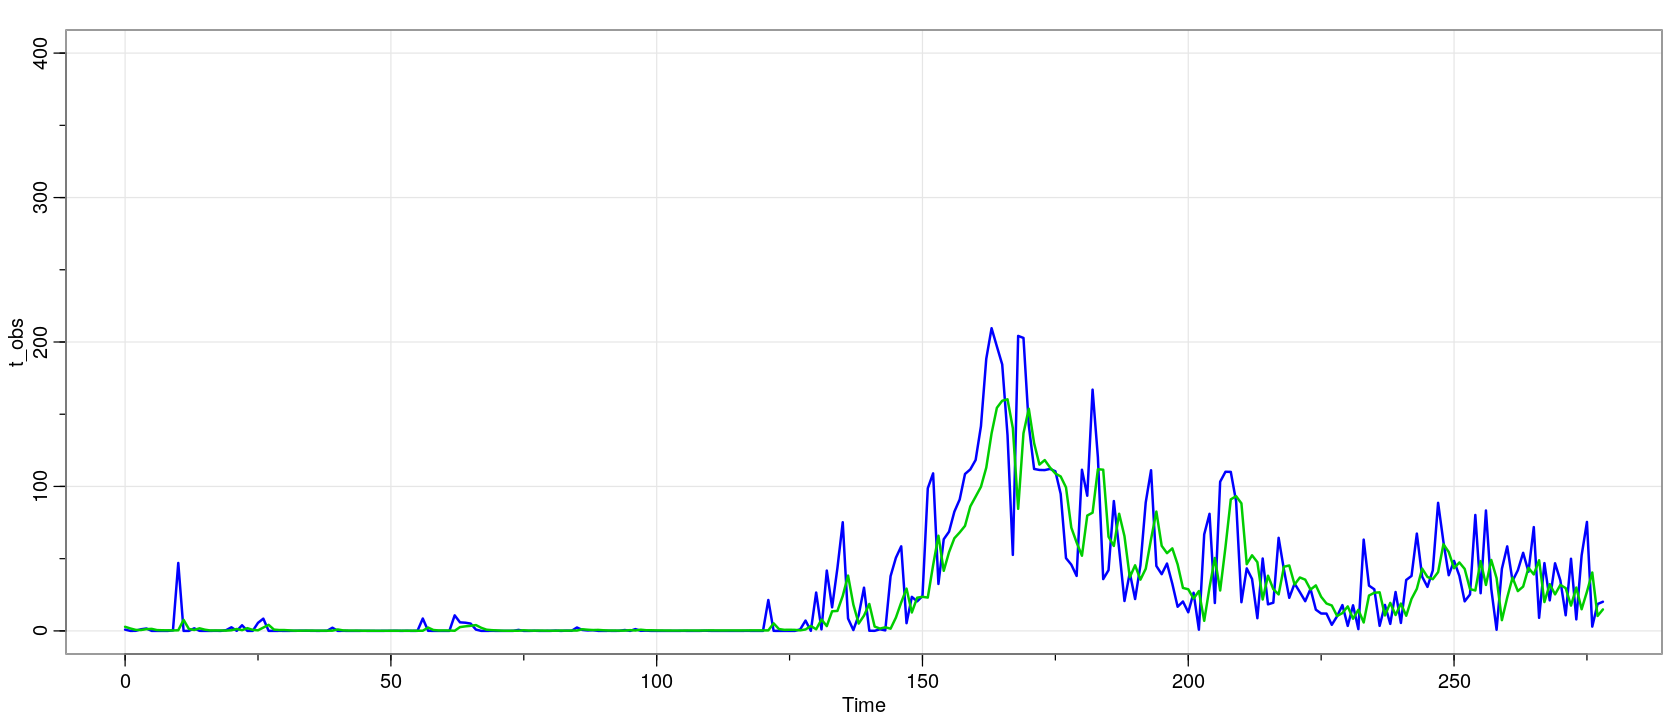

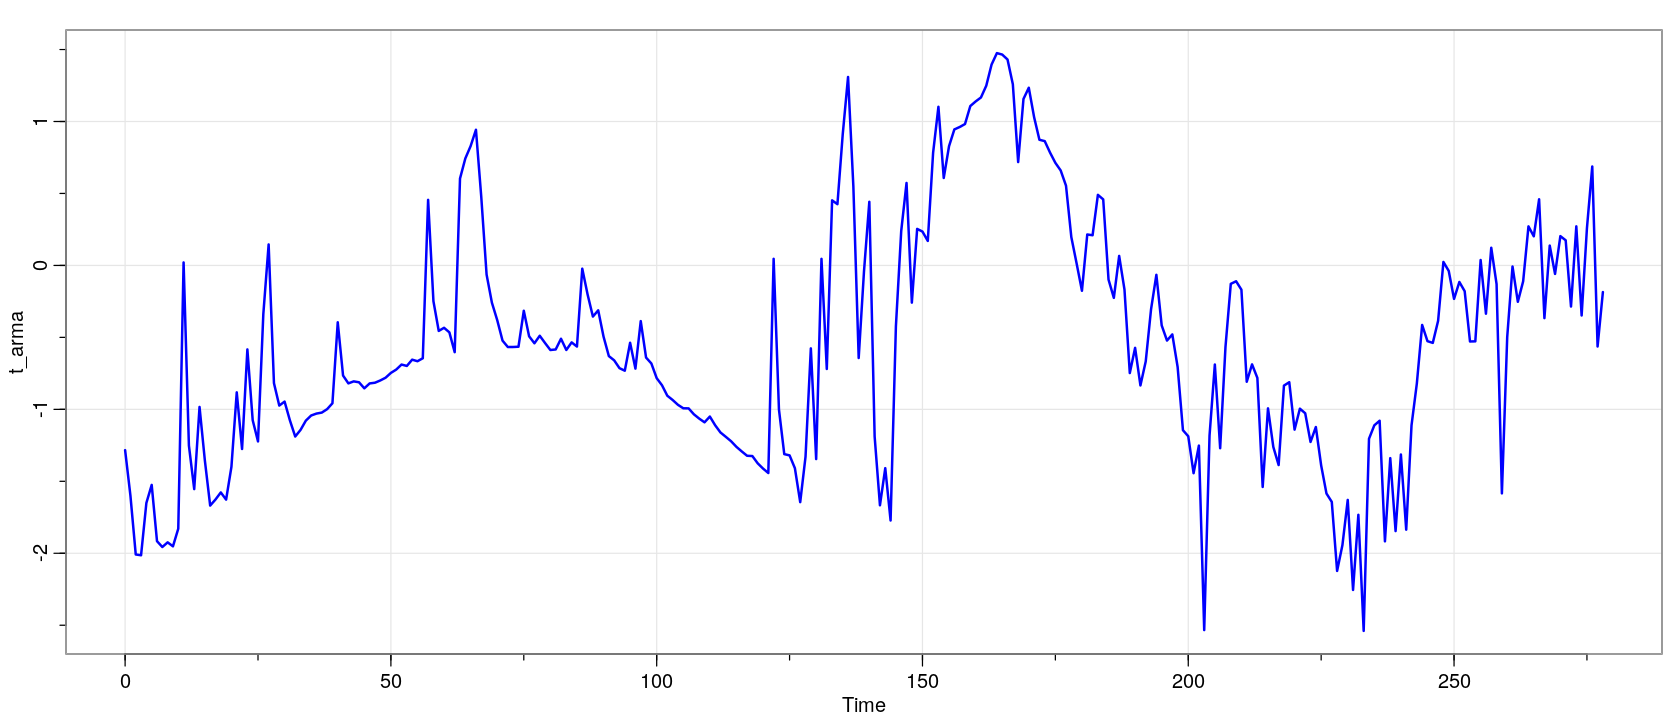

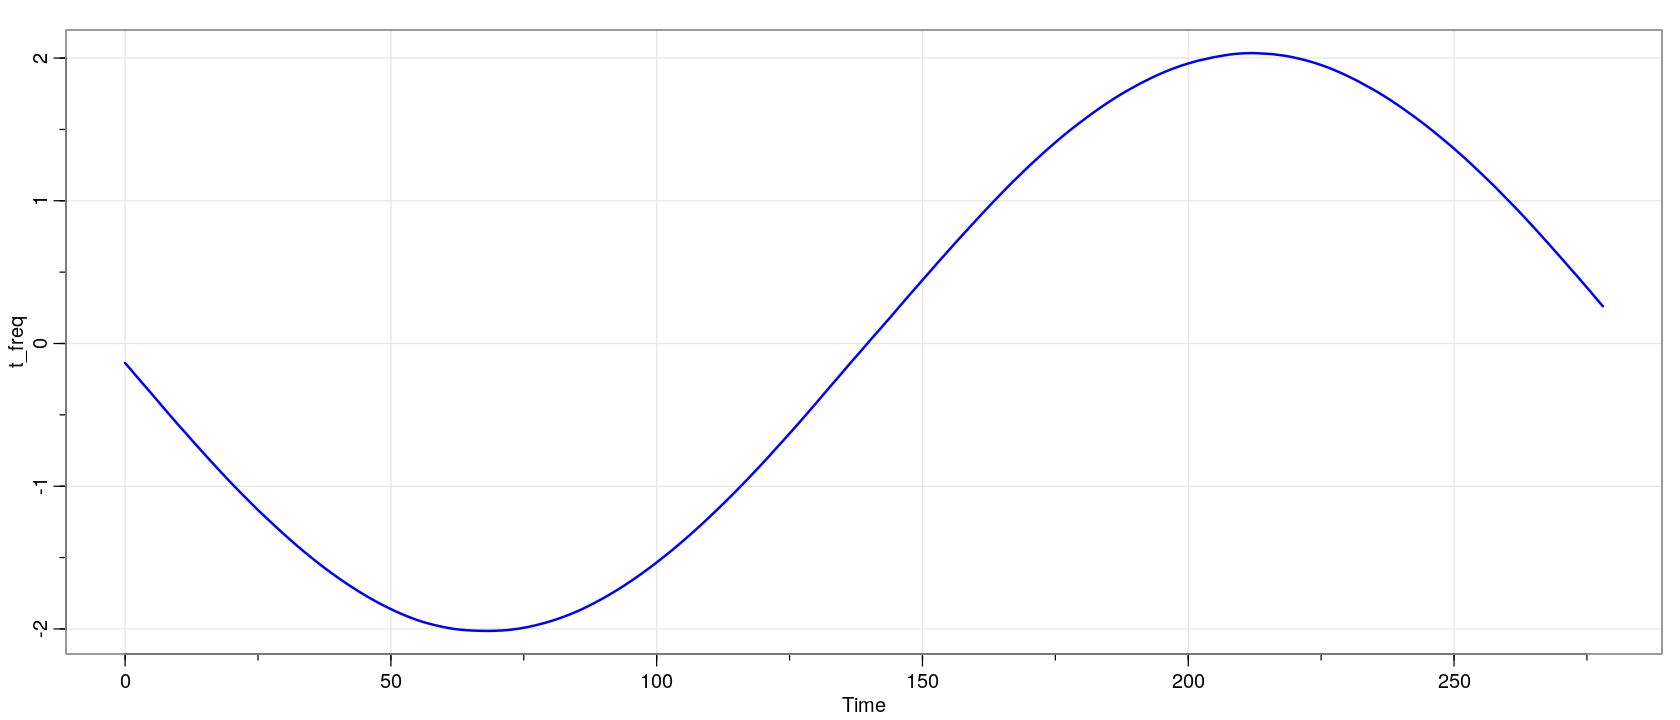

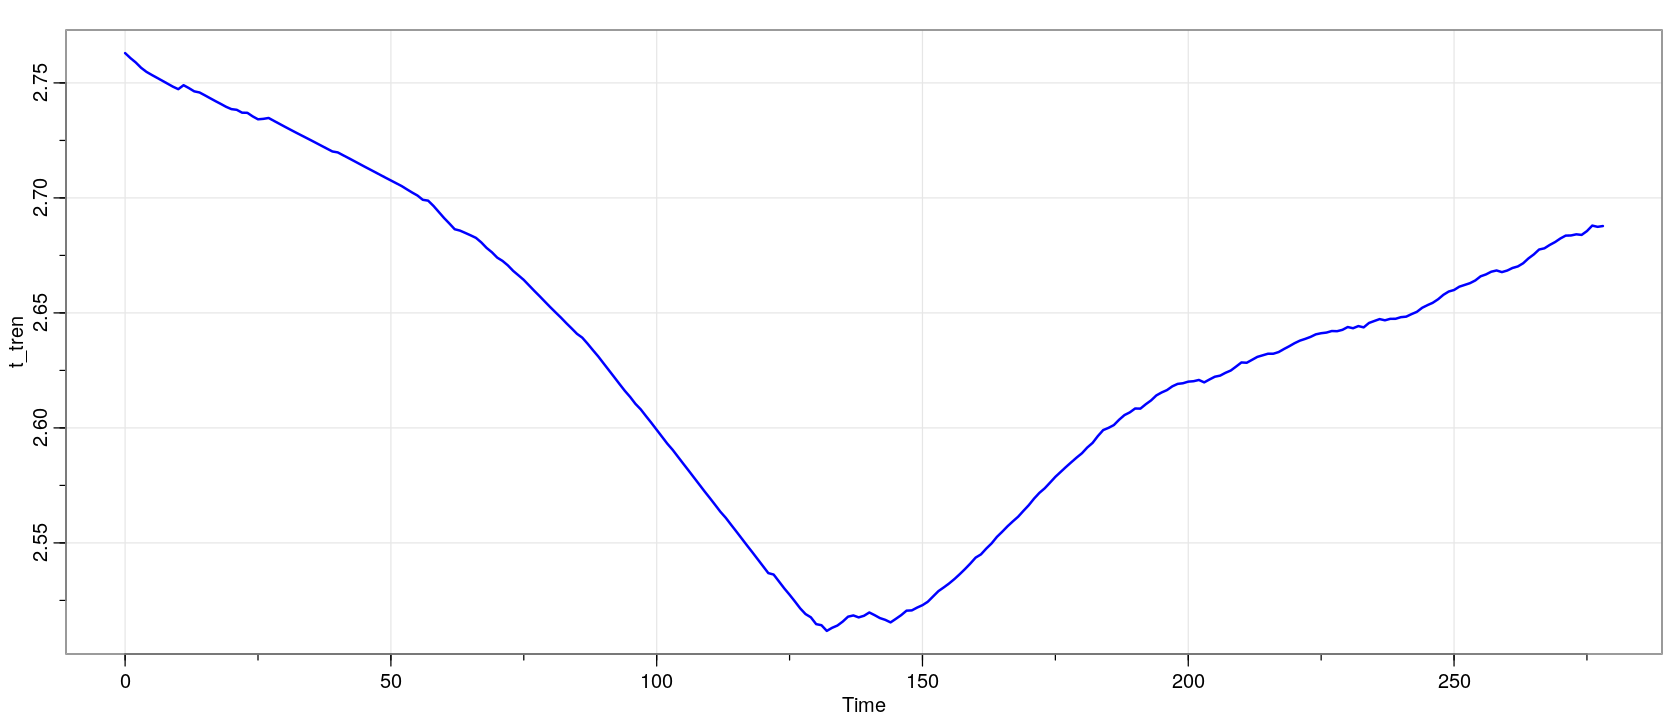

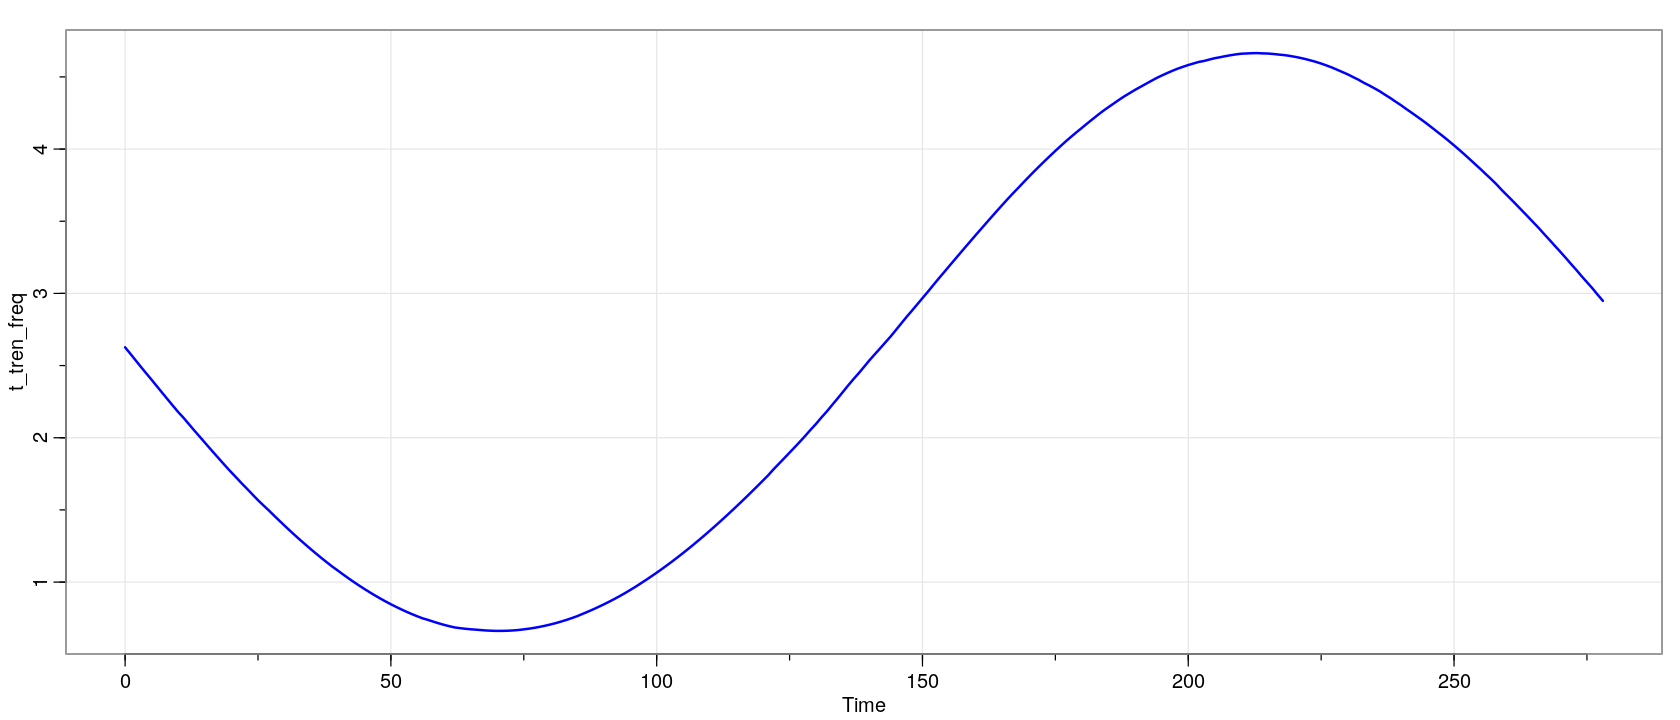

In [62]:
tsplot(t_obs, col=4, lwd=2, ylim=c(0,400))
lines(t_pred, col=3, lwd=2)

tsplot(t_arma, col=4, lwd=2)
tsplot(t_freq, col=4, lwd=2)
tsplot(t_tren, col=4, lwd=2)

tsplot(t_tren_freq, col=4, lwd=2)


In [63]:
Sys.time()

[1] "2021-07-24 16:28:00 -03"

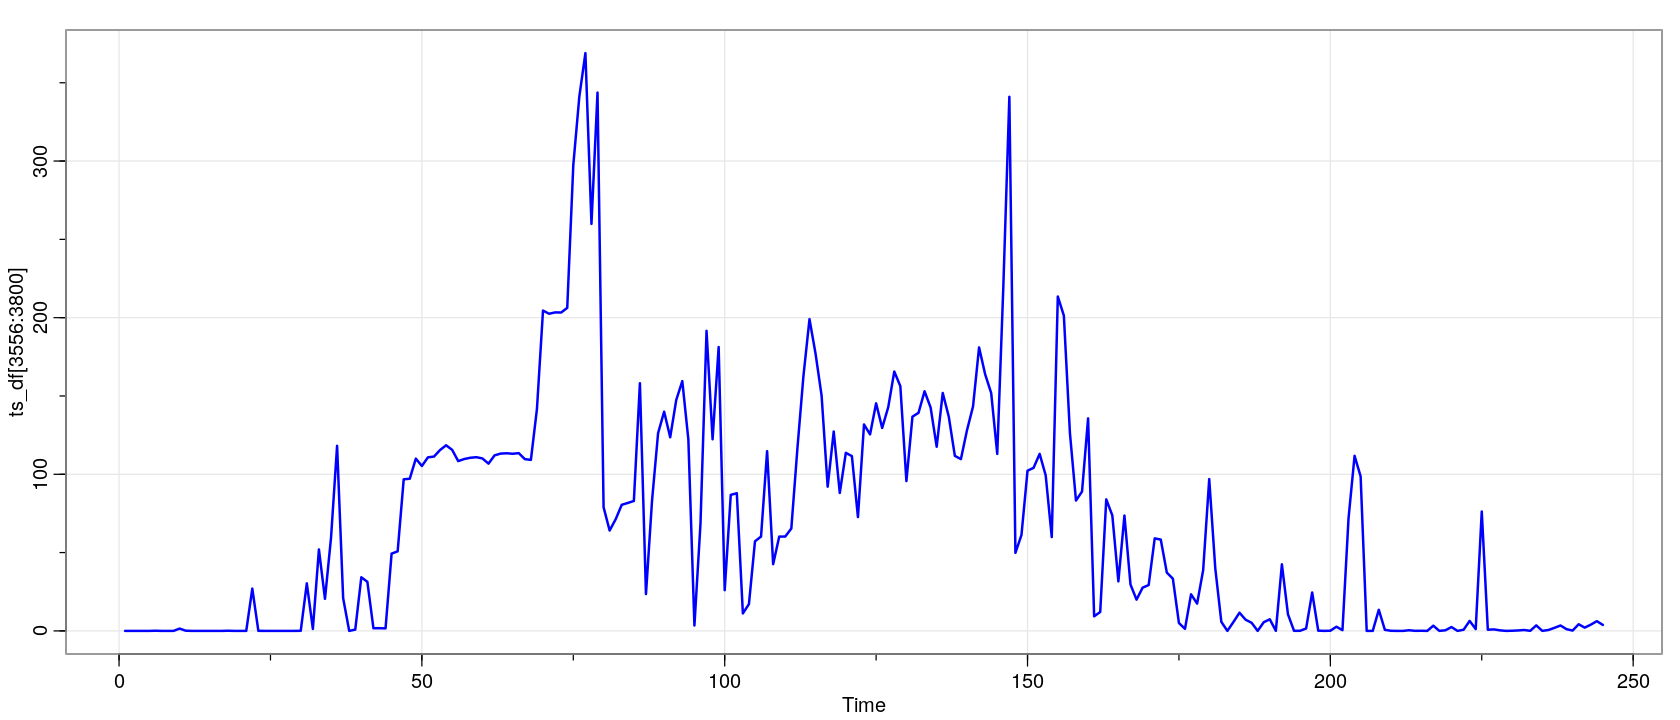

In [64]:
tsplot(ts_df[3556:3800], col=4, lwd=2)